<a href="https://colab.research.google.com/github/kaqreal/ds-Capstone_Fish_Project/blob/Erik_Colab/Model_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

import matplotlib.pyplot as plt
%load_ext tensorboard
import datetime

In [3]:
# Formatting the column display in jupyter labs
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_colwidth', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pathlib
from pathlib import Path

In [6]:
data_dir = Path("/content/drive/MyDrive/fish_photos/numbered")

In [7]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)


4411


In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4411 files belonging to 483 classes.
Using 3529 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4411 files belonging to 483 classes.
Using 882 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['A73EGS-P', 'CUNWCB-Y', 'Istiophorus_platypterus', 'P1ROZC-Z', 'PQV7DP-S', 'acanthaluteres_brownii', 'acanthaluteres_spilomelanurus', 'acanthaluteres_vittiger', 'acanthistius_cinctus', 'acanthopagrus_australis', 'acanthopagrus_berda', 'acanthopagrus_latus', 'achoerodus_gouldii', 'achoerodus_viridis', 'acreichthys_tomentosus', 'aesopia_cornuta', 'aethaloperca_rogaa', 'alectis_ciliaris', 'alectis_indica', 'alepes_kleinii', 'aluterus_monoceros', 'aluterus_scriptus', 'amanses_scopas', 'anampses_caeruleopunctatus', 'anampses_elegans', 'anampses_femininus', 'anampses_geographicus', 'anampses_lennardi', 'anampses_melanurus', 'anampses_meleagrides', 'anampses_neoguinaicus', 'anampses_twistii', 'anodontostoma_chacunda', 'anyperodon_leucogrammicus', 'aphareus_furca', 'aphareus_rutilans', 'aprion_virescens', 'argyrops_spinifer', 'aseraggodes_melanostictus', 'atractoscion_aequidens', 'atule_mate', 'auxis_rochei', 'auxis_thazard', 'bathylagichthys_greyae', 'beryx_decadactylus', 'bodianus_anthioide

# Neuer Abschnitt

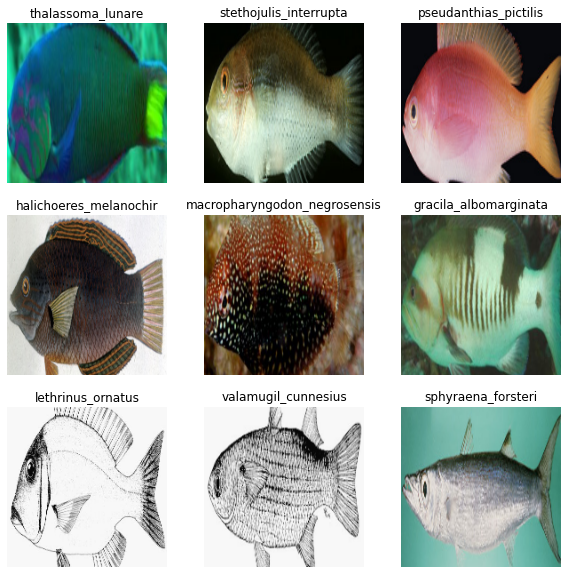

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
# normalize color values
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 483

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
#logdir = "logs/scalars/" + datetime.now.strftime("%Y%m%d-%H%M%S")

In [55]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)


Epoch 1/20
111/111 [==============================] - 3s 29ms/step - loss: 0.1028 - accuracy: 0.9731 - val_loss: 13.1291 - val_accuracy: 0.2075
Epoch 2/20
111/111 [==============================] - 3s 29ms/step - loss: 0.0843 - accuracy: 0.9770 - val_loss: 15.3615 - val_accuracy: 0.2063
Epoch 3/20
111/111 [==============================] - 3s 29ms/step - loss: 0.0894 - accuracy: 0.9762 - val_loss: 14.5801 - val_accuracy: 0.2143
Epoch 4/20
111/111 [==============================] - 3s 29ms/step - loss: 0.0725 - accuracy: 0.9824 - val_loss: 14.0243 - val_accuracy: 0.2086
Epoch 5/20
111/111 [==============================] - 3s 29ms/step - loss: 0.0533 - accuracy: 0.9878 - val_loss: 14.7502 - val_accuracy: 0.2052
Epoch 6/20
111/111 [==============================] - 3s 29ms/step - loss: 0.0315 - accuracy: 0.9943 - val_loss: 15.1797 - val_accuracy: 0.2177
Epoch 7/20
111/111 [==============================] - 3s 28ms/step - loss: 0.0215 - accuracy: 0.9949 - val_loss: 15.2159 - val_accuracy:

In [20]:
model.save(Path("/content/drive/MyDrive/fish_photos"), overwrite=True, include_optimizer=True)

In [21]:
test_dir = Path("/content/drive/MyDrive/fish_photos/Testfish")

In [22]:
img = ("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish.jpg")

In [23]:
plt.imshow(img.numpy().astype("uint8"))

AttributeError: ignored

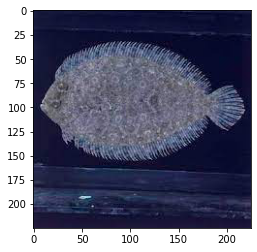

In [24]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish.jpg")
 
# Output Images
plt.imshow(img)

In [59]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish.jpg")
   np_image = np.array(np_image).astype(int)
   np_image = transform.resize(np_image, (180, 180, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish.jpg")
y_pred = model.predict(image).argmax(axis=1)
y_pred


1/1 [==============================] - 0s 25ms/step


array([57])

In [64]:
class_names[57]

'bothus_pantherinus'

In [62]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish2- carcharhinus_galapagensis.jpg")
   np_image = np.array(np_image).astype(int)
   np_image = transform.resize(np_image, (180, 180, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image3 = load("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish2- carcharhinus_galapagensis.jpg")
y_pred = model.predict(image3).argmax(axis=1)
y_pred

1/1 [==============================] - 0s 27ms/step


array([57])

In [61]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish3_Otrub.jpg")
   np_image = np.array(np_image).astype(int)
   np_image = transform.resize(np_image, (180, 180, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image5 = load("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish3_Otrub.jpg")
y_pred = model.predict(image5).argmax(axis=1)
y_pred

1/1 [==============================] - 0s 23ms/step


array([57])

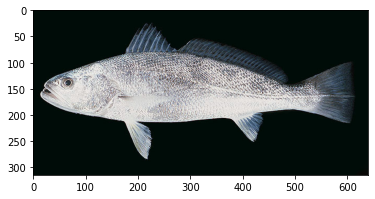

In [53]:
# Read Images
img = mpimg.imread("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish3_Otrub.jpg")
 
# Output Images
plt.imshow(img)


In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
image_size = 180

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)

In [ ]:
num_classes = 483
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  #resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=12
)

# Neuer Abschnitt

In [65]:
import pathlib
from pathlib import Path

In [66]:
data_dir = Path('/content/drive/MyDrive/fish_photos/numbered')

In [67]:
batch_size = 32
img_height = 150
img_width = 150

In [68]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4411 files belonging to 483 classes.
Using 3529 files for training.


In [69]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4411 files belonging to 483 classes.
Using 882 files for validation.


In [73]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1)])

In [74]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(483)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [75]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss= keras.losses.CategoricalCrossentropy(from_logits=False), #reduction=losses_utils.ReductionV2.AUTO,
    metrics=[keras.metrics.CategoricalAccuracy()],
)

epochs = 20


model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
111/111 [==============================] - 27s 199ms/step - loss: 9.5037 - categorical_accuracy: 0.0139 - val_loss: 11.8014 - val_categorical_accuracy: 0.0204
Epoch 2/20
111/111 [==============================] - 21s 182ms/step - loss: 11.8860 - categorical_accuracy: 0.0385 - val_loss: 11.6502 - val_categorical_accuracy: 0.0159
Epoch 3/20
111/111 [==============================] - 21s 182ms/step - loss: 11.5789 - categorical_accuracy: 0.0326 - val_loss: 11.2449 - val_categorical_accuracy: 0.0136
Epoch 4/20
111/111 [==============================] - 21s 180ms/step - loss: 11.6885 - categorical_accuracy: 0.0419 - val_loss: 11.5468 - val_categorical_accuracy: 0.0193
Epoch 5/20
111/111 [==============================] - 23s 199ms/step - loss: 11.6991 - categorical_accuracy: 0.0507 - val_loss: 10.6705 - val_categorical_accuracy: 0.0170
Epoch 6/20
111/111 [==============================] - 21s 181ms/step - loss: 11.4415 - categorical_accuracy: 0.0493 - val_loss: 11.4010 - val_cate

In [76]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()],
)

epochs = 10
# epochs = 2

model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [77]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [79]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish.jpg")
   np_image = np.array(np_image).astype(int)
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish.jpg")
y_pred = model.predict(image).argmax(axis=1)
y_pred

1/1 [==============================] - 1s 1s/step


array([80])

In [80]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish2- carcharhinus_galapagensis.jpg")
   np_image = np.array(np_image).astype(int)
   np_image = transform.resize(np_image, (180, 180, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image3 = load("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish2- carcharhinus_galapagensis.jpg")
y_pred = model.predict(image3).argmax(axis=1)
y_pred

1/1 [==============================] - 1s 1s/step


array([80])

In [81]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish3_Otrub.jpg")
   np_image = np.array(np_image).astype(int)
   np_image = transform.resize(np_image, (180, 180, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image5 = load("/content/drive/MyDrive/fish_photos/Testfish/Testfish/Testfish3_Otrub.jpg")
y_pred = model.predict(image5).argmax(axis=1)
y_pred

1/1 [==============================] - 0s 41ms/step


array([80])

In [82]:
class_names[80]

'carcharhinus_albimarginatus'